# Zadanie 1
Jako przykład rozważmy dana zawierające poziomy przepływu ($\mu g/l$) w trzech grupach pacjentów z zastawką serca z różnymi poziomami wentylacji azotem. W analizie wzięło udział 22 osoby (https://github.com/przem85/statistics/blob/master/D7/ANOVA1.txt).

Zerową hipoteza dla ANOVA mówi, że wszystkie grupy pochodzą z tej samej populacji. 


In [21]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
data = np.loadtxt('ANOVA1.txt')
 # Sort them into groups, according to column 1
group1 = data[data[:,1]==1,0]
group2 = data[data[:,1]==2,0]
group3 = data[data[:,1]==3,0]

Text(0, 0.5, 'Feature')

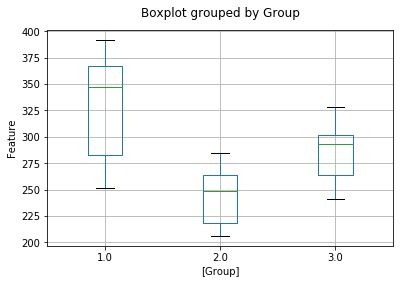

In [23]:
data1 = pd.DataFrame({'Feature':data[:,0],'Group':data[:,1]})
data1.boxplot(by = 'Group')
plt.title('')
plt.ylabel('Feature')

In [24]:
print(group1)
print(group2)
print(group3)

[251. 275. 291. 347. 354. 380. 392.]
[206. 210. 226. 249. 255. 273. 285.]
[295. 309. 241. 258. 270. 293. 328.]


## Saprawdzamy założenie o równości variancii 

In [25]:
# First, check if the variances are equal, with the "Levene"-test
(W,p) = stats.levene(group1, group2, group3)
if p<0.05:
    print(('Warning: the p-value of the Levene test is <0.05: p={0}'.format(p)))

## Wykonujemy ANOVE jednoczynnikową 

In [26]:
# Do the one-way ANOVA
F_statistic, pVal = stats.f_oneway(group1, group2, group3)

In [27]:
print((F_statistic, pVal))
if pVal < 0.05:
    print('One of the groups is significantly different.')

(7.61054311210921, 0.004024649740530089)
One of the groups is significantly different.


## Bardziej szczegółowym wynikiem ANOVA można otrzymać za pomom modelowania statystycznego:

In [28]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
# Elegant alternative implementation, with pandas & statsmodels
df = pd.DataFrame(data, columns=['value', 'treatment'])    
#df

In [29]:
model = ols('value ~ C(treatment)', df).fit()
anovaResults = anova_lm(model)
print(anovaResults)

                df        sum_sq       mean_sq         F    PR(>F)
C(treatment)   2.0  24529.142857  12264.571429  7.610543  0.004025
Residual      18.0  29007.428571   1611.523810       NaN       NaN


# Możemy policzyć ten test na piechotę

In [30]:
data = np.loadtxt('ANOVA1.txt')

In [31]:
# Convert them to pandas-forman and group them by their group value
df = pd.DataFrame(data, columns=['values', 'group'])
groups = df.groupby('group')

In [32]:
# The "total sum-square" is the squared deviation from the mean
ss_total = np.sum((df['values']-df['values'].mean())**2)
ss_total

53536.571428571435

$$
SS_{Error}= \sum_{i} \sum_{j} {(Y_{ij} - Ῡ_{i})^2}
$$

$$
SS_{Treatment}= n*\sum_{i} {(Ῡ_{i} - Ῡ)^2}
$$

In [33]:
# Calculate ss_treatment and  ss_error
(ss_treatments, ss_error) = (0, 0)
for val, group in groups:
    print(val)
    ss_error += sum((group['values'] - group['values'].mean())**2)
    ss_treatments +=  (group['values'].mean() - df['values'].mean())**2
print(ss_treatments * len(data))
print(ss_error)

1.0
2.0
3.0
73587.42857142862
29007.428571428572


In [34]:
ss_treatments

3504.163265306125

Średnie kwadraty (mean squares) (MS) to SS podzielone przez odpowiednie stopnie swobody (DF).

In [15]:
df_groups = len(groups)-1
df_residuals = len(data)-len(groups)

Otrzymujemy również wartość statystyki $F$:
$$
F=\frac{MS_{Treatments}}{MS_{Error}}=\frac{SS_{Treatments}/(n_{groups}-1)}{SS_{Error}/(n_{total}-n_{groups})}
$$

In [16]:
F = (ss_treatments/df_groups) / (ss_error/df_residuals)
df = stats.f(df_groups,df_residuals)
p = df.sf(F)
print(('ANOVA-Results: F = {0}, and p={1}'.format(F, p)))

ANOVA-Results: F = 7.610543112109219, and p=0.004024649740530066
